# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #3
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 16th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Optimization via Descent

Suppose you are building a pricing model for laying down telecom cables over a geographical region. Your model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss in revenue corresponding to the price model at location $(x, y)$ is described by
$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x - 0.0005\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$
Read the data contained in `HW3_data.csv`. This is a set of coordinates configured on the curve $y^2 - x^2 = -0.1$. Given the data, find parameters $\lambda_1, \lambda_2$ that minimize the net loss over the entire dataset.

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

x, y = np.genfromtxt('HW3_data.csv', delimiter=',')

In [4]:
x_sum = x.sum()
y_sum = y.sum()
n = len(x)

L = lambda l1, l2, x, y: 0.000045 * l2**2 * y.sum() - 0.000098 * l1**2 * x.sum() + 0.003926 * x.sum() * l1 * np.exp(-0.1 * (l1**2 + l2**2))

print 'the min total cost', L(2.05384, 0, x, y)

the min total cost -9.9341040253


Note min total cose is the "same" (up to a constant) as min average cost since our data is fixed!

In [5]:
print 'total cost closed form: {} * l2^2 - ({}) * l1^2 + {} * l1 * e^(-0.1(l1^2 + l2^2))'.format(0.000045 * y_sum, 0.000098 * x_sum, 0.003926 * x_sum)

total cost closed form: 0.199738674533 * l2^2 - (-0.1997025438) * l1^2 + -8.00032843835 * l1 * e^(-0.1(l1^2 + l2^2))


Put this total cost function into Wolfram if needed to get global min and gradient!

In [6]:
#the gradient!!
grad = lambda l1, l2, x, y: np.array([-0.000098 * 2 * l1 * x.sum() + 0.003926 *  x.sum() * np.exp(-0.1 * (l1**2 + l2**2)) - 0.003926 * 2 * 0.1 *  x.sum() * l1**2 * np.exp(-0.1 * (l1**2 + l2**2)), 2 * 0.000045 * l2 * y.sum() - 0.1 * 2* 0.003926 *  x.sum() * l1 * l2 * np.exp(-0.1 * (l1**2 + l2**2))])

You can literally copy and paste rahul's lecture code and change the gradient line!!

***NOTE: YOU SHOULD DO DESCENT USING MEAN COST FUNCTION SO WE CAN COMPARE WITH SGD LATER!!!!***

In [7]:
#literally code from Rahul's lecture
def gradient_descent(x, y, theta_init, step=0.01, maxsteps=0, precision=0.001):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
   
    counter = 0
    oldcost = 0

    currentcost = L(theta[0], theta[1], x, y)

    costs.append(currentcost)
    history.append(np.array([0, 0]))
    history.append(theta)
    
    counter+=1
    while np.linalg.norm(history[-1] - np.array([2.05384, 0])) > precision:
        oldcost=currentcost
        gradient = grad(theta[0], theta[1], x, y)
        theta = theta -  step * gradient * 1000./len(x)  #I'M SCALING THE MEAN LOST FUNCTION GRADIENT BY FACTOR OF 1000
        history.append(theta)
        
        currentcost = L(theta[0], theta[1], x, y)
        costs.append(currentcost)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, counter

total time:  4.47974300385
how many iters:  43590
final cost: -9.93410274837
precision to actual param: 0.000999951387578


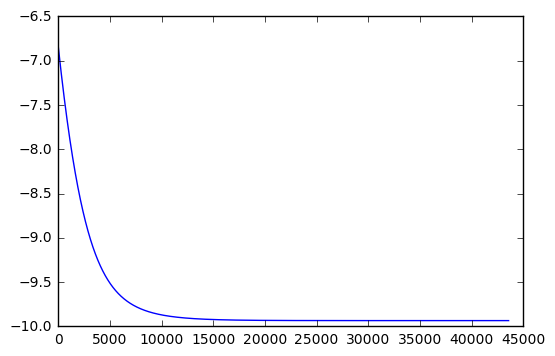

In [31]:
#theta_i = [4, 2]
#theta_i = [-5, 2]
#theta_i = [15, 16]
#theta_i = [2, 0.5]
theta_i = [3, -1]
#theta_i = [-10, 12]
start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, maxsteps=100000, step=0.001)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

***Yay that worked!!!***

Again, literally the code is copy and pasted from Rahul's lecture with like one line changed!!!!

In [81]:
#RAHUL's CODE FROM LECTURE

def sgd(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001):
    costs = []
    m = len(x) # number of data points
    oldtheta = [1000, 1000]
    theta = theta_init
    history = [] # to store all thetas
    grads=[]
    counter = 0
    oldcost = 0
    epoch = 0
    i = 0 #index

    gradient = grad(theta[0], theta[1], x[i], y[i])
    
    grads.append(gradient)

    currentcost = L(theta[0], theta[1], x, y)
    
    counter+=1

    costsum = currentcost
    
    costs.append(currentcost)
    
    history.append(theta)
    
    
    #while abs(currentcost - oldcost) > precision:
    while np.linalg.norm(np.array(theta) - np.array([2.05384, 0])) > precision:
        #print("hi", precision)
        #oldcost=currentcost
        gradient = grad(theta[0], theta[1], x[i], y[i])
        grads.append(gradient)
        oldtheta = theta[:]

        theta = theta - step * gradient * 500.  #I'M SCALING THE GRADIENT BY FACTOR OF 1000!!!
        
        history.append(theta)
        i += 1
        if i > m - 1:#reached one past the end.
            #break
            epoch +=1
            print epoch
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            i = 0

        oldcost = currentcost
        currentcost =  L(theta[0], theta[1], x, y)
        costs.append(currentcost)
        counter+=1

        if maxsteps:
            if counter == maxsteps:
                break
        
    
    return history, costs, grads, counter, epoch

total time:  0.258879899979
how many iters:  3826
final total cost:  nan
precision to optimal params:  nan


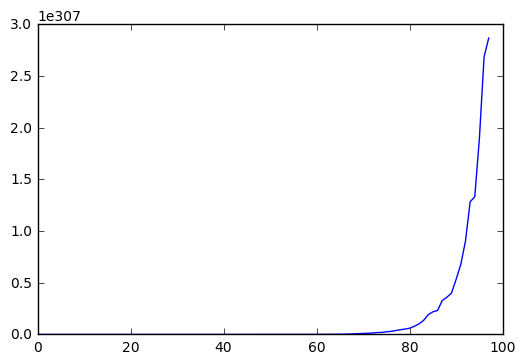

In [137]:
#[4, 2]
#theta_i = [1.5, 0.9] 
#theta_i = [4, 2]
#theta_i = [2, 0.5]
#theta_i = [-10, 12]
theta_i = [3, -1]
start = time.time()
history, costs, grads, counter, epoch = sgd(x, y, theta_i, step=0.01, maxsteps=100000)
print 'total time: ', time.time() - start
print 'how many iters: ', len(costs)
print 'final total cost: ', costs[-1]
print 'precision to optimal params: ', np.linalg.norm(history[-1] - np.array([2.05384, 0]))
plt.plot(range(len(costs[-100:])), costs[-100:])
plt.show()

***YAY that also worked*** SGD takes more iterations to converge to where you want but each gradient update is faster. NOW TRY DIFFERENT INITIALIZATIONS AND STEPSIZES!!!

GD

total time:  10.0451231003
how many iters:  100000
final cost: 8.16152869937
precision to actual param: 7.41708926028


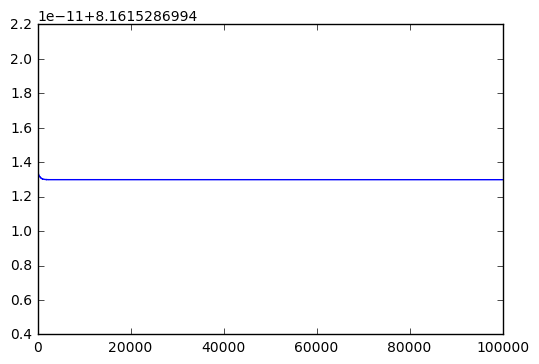

In [8]:
theta_i = [-5.36325, 0]

start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, step=0.01, maxsteps=100000)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

total time:  10.3520379066
how many iters:  100000
final cost: 8.16152869937
precision to actual param: 7.41708926028


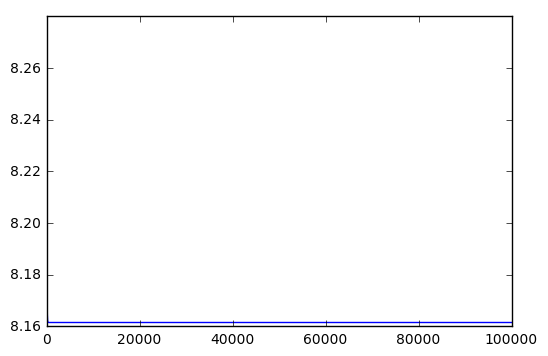

In [60]:
theta_i = [-5, 0]

start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, step=0.1, maxsteps=100000)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

total time:  0.998345851898
how many iters:  10000
final cost: 8.16152869937
precision to actual param: 7.41708926028


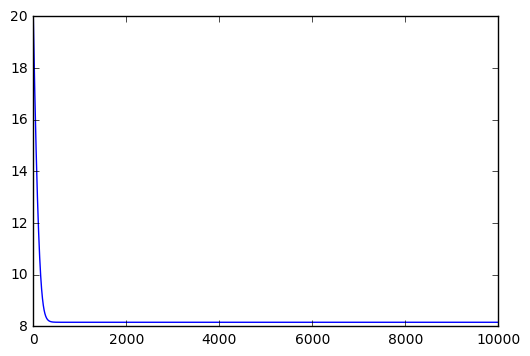

In [46]:
theta_i = [-10, 0]

start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, step=0.1, maxsteps=10000)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

total time:  1.02074790001
how many iters:  10000
final cost: 8.16152869937
precision to actual param: 7.41708926028


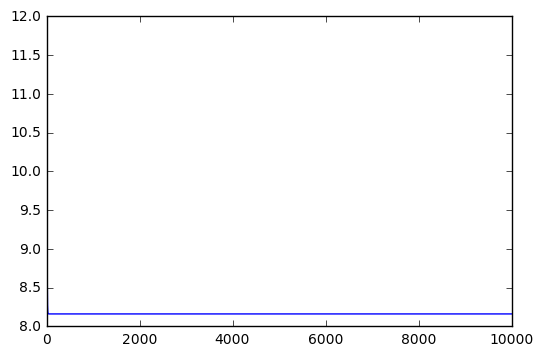

In [49]:
theta_i = [-3, 0]

start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, step=1, maxsteps=10000)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

total time:  0.993627071381
how many iters:  10000
final cost: 8.16252499684
precision to actual param: 7.38316868954


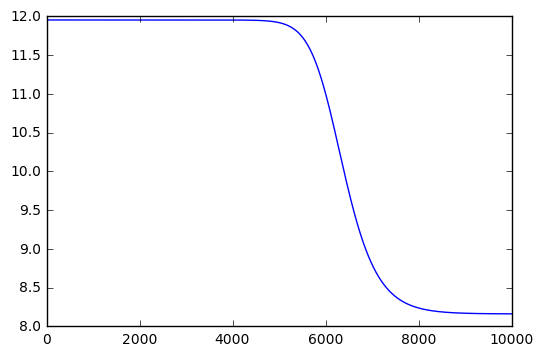

In [64]:
theta_i = [-2.47865, 0]

start = time.time()
history, cost, iters = gradient_descent(x, y, theta_i, step=0.01, maxsteps=10000)
print 'total time: ', time.time() - start
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

SGD

total time:  0.58193397522
how many iters:  8134
final total cost:  -9.93410324239
precision to optimal params:  0.000548080227258


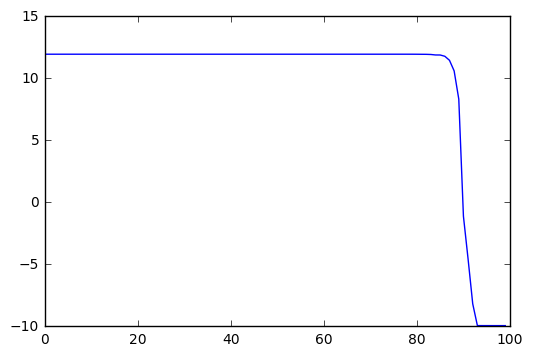

In [156]:
theta_i = [-5, 0]
start = time.time()
history, costs, grads, counter, epoch = sgd(x, y, theta_i, step=0.01, maxsteps=100000)
print 'total time: ', time.time() - start
print 'how many iters: ', len(costs)
print 'final total cost: ', costs[-1]
print 'precision to optimal params: ', np.linalg.norm(history[-1] - np.array([2.05384, 0]))
plt.plot(range(len(costs[-100:])), costs[-100:])
plt.show()

1
2
3
4
5
6
total time:  6.81631302834
how many iters:  100000
final total cost:  8.16152869937
precision to optimal params:  7.41708926028


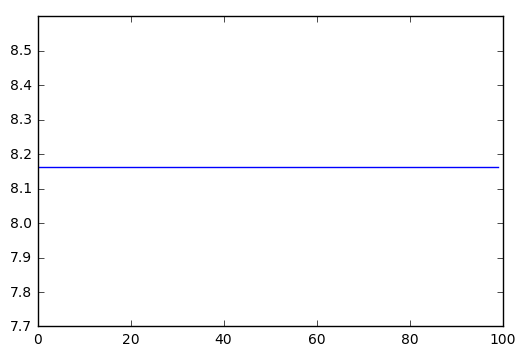

In [70]:
theta_i = [-10, 0]
start = time.time()
history, costs, grads, counter, epoch = sgd(x, y, theta_i, step=0.001, maxsteps=100000)
print 'total time: ', time.time() - start
print 'how many iters: ', len(costs)
print 'final total cost: ', costs[-1]
print 'precision to optimal params: ', np.linalg.norm(history[-1] - np.array([2.05384, 0]))
plt.plot(range(len(costs[-100:])), costs[-100:])
plt.show()

1
2
3
4
5
6
total time:  6.69171714783
how many iters:  100000
final total cost:  8.16152869937
precision to optimal params:  7.41708926028


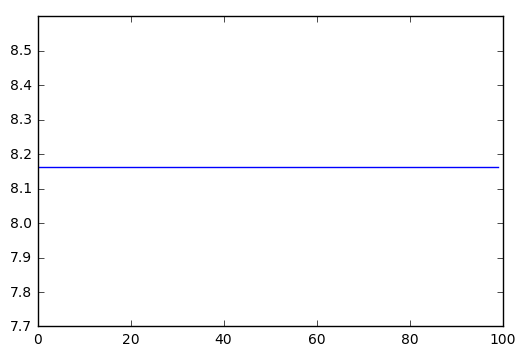

In [72]:
theta_i = [-5.36325, 0]

start = time.time()
history, costs, grads, counter, epoch = sgd(x, y, theta_i, step=0.001, maxsteps=100000)
print 'total time: ', time.time() - start
print 'how many iters: ', len(costs)
print 'final total cost: ', costs[-1]
print 'precision to optimal params: ', np.linalg.norm(history[-1] - np.array([2.05384, 0]))
plt.plot(range(len(costs[-100:])), costs[-100:])
plt.show()

SA: LITERALLY RAHULS CODE AGAIN

In [117]:
import math
from functools import partial
from scipy.stats import multivariate_normal
rv = lambda x: np.random.multivariate_normal(x, [[1, 0], [0, 1]], 1)[0]

tf = lambda t: 0.8*t #temperature function
itf = lambda length: math.ceil(1.2*length) #iteration function
pfxs = lambda s, x: x + s*np.random.normal()

pf = partial(pfxs, 0.1)
f = lambda l: L(l[0], l[1], x, y)
print rv([0.1, 2])

def sa(energyfunc, initials, epochs, tempfunc, iterfunc, proposalfunc):
    accumulator=[]
    best_solution = old_solution = initials['solution']
    T=initials['T']
    length=initials['length']
    best_energy = old_energy = energyfunc(old_solution)
    accepted=0
    total=0
    
    for index in range(epochs):
        print("Epoch", index)
        if index > 0:
            T = tempfunc(T)
            length=iterfunc(length)
        print("Temperature", T, "Length", length)

        for it in range(int(length)):
            total+=1
            new_solution = proposalfunc(old_solution)
            new_energy = energyfunc(new_solution)
            # Use a min here as you could get a "probability" > 1
            alpha = min(1, np.exp((old_energy - new_energy)/T))
            #print old_energy, new_energy, alpha
            if ((new_energy < old_energy) or (np.random.uniform() < alpha)):
                # Accept proposed solution
                accepted+=1
                accumulator.append((T, new_solution, new_energy))
                if new_energy < best_energy:
                    # Replace previous best with this one
                    best_energy = new_energy
                    best_solution = new_solution
                    best_index=total
                    best_temp=T
                old_energy = new_energy
                old_solution = new_solution
            else:
                # Keep the old stuff
                accumulator.append((T, old_solution, old_energy))

    
    best_meta=dict(index=best_index, temp=best_temp)
    print("frac accepted", accepted * 1./total, "total iterations", total, 'bmeta', best_meta)
    return best_meta, best_solution, best_energy, accumulator

[-0.93040367  2.98649067]


In [157]:
inits=dict(solution=np.array([-5, 0]), length=500, T=20)
bmeta, bs, be, out = sa(f, inits, 20, tf, itf, rv)
print bs
print f(bs)

('Epoch', 0)
('Temperature', 20, 'Length', 500)
('Epoch', 1)
('Temperature', 16.0, 'Length', 600.0)
('Epoch', 2)
('Temperature', 12.8, 'Length', 720.0)
('Epoch', 3)
('Temperature', 10.240000000000002, 'Length', 864.0)
('Epoch', 4)
('Temperature', 8.192000000000002, 'Length', 1037.0)
('Epoch', 5)
('Temperature', 6.553600000000002, 'Length', 1245.0)
('Epoch', 6)
('Temperature', 5.242880000000002, 'Length', 1494.0)
('Epoch', 7)
('Temperature', 4.194304000000002, 'Length', 1793.0)
('Epoch', 8)
('Temperature', 3.3554432000000016, 'Length', 2152.0)
('Epoch', 9)
('Temperature', 2.6843545600000014, 'Length', 2583.0)
('Epoch', 10)
('Temperature', 2.147483648000001, 'Length', 3100.0)
('Epoch', 11)
('Temperature', 1.717986918400001, 'Length', 3720.0)
('Epoch', 12)
('Temperature', 1.3743895347200008, 'Length', 4464.0)
('Epoch', 13)
('Temperature', 1.0995116277760006, 'Length', 5357.0)
('Epoch', 14)
('Temperature', 0.8796093022208006, 'Length', 6429.0)
('Epoch', 15)
('Temperature', 0.70368744177664

In [160]:
T_out = [o[2] for o in out if o[0] == 1.0995116277760006]

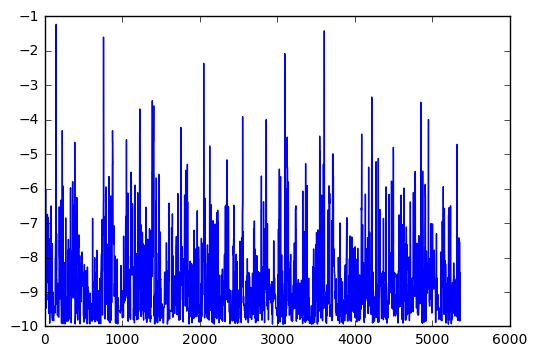

In [161]:
print 
plt.plot(range(len(T_out)), T_out)